# GloVe (Gensim)

For looking at word vectors, we'll use **Gensim**. **Gensim** isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.   We gonna use **GloVe** embeddings, downloaded at [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

In [1]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim

#you have to put this file in some python/gensim directory; just run it and it will inform where to put....


In [2]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

In [3]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [4]:
similar_words = new_model.wv.most_similar(positive=['government'], topn=5)
print("Most similar words to 'government':", similar_words)


Most similar words to 'government': [('nation', 0.9280838370323181), ('policy', 0.9250353574752808), ('power', 0.9234175086021423), ('Christian', 0.9232916235923767), ('education', 0.9203680753707886)]


### Similarity

In [7]:
model

In [9]:
model.wv.most_similar('government')


[('nation', 0.9279264211654663),
 ('policy', 0.9250516891479492),
 ('Christian', 0.9233377575874329),
 ('power', 0.9232932925224304),
 ('education', 0.9204490780830383),
 ('national', 0.9140437841415405),
 ('community', 0.9124909043312073),
 ('land', 0.9083278179168701),
 ('property', 0.9076618552207947),
 ('influence', 0.9051369428634644)]

In [12]:
model.wv.most_similar('news')

[('Review', 0.9578880071640015),
 ('delightful', 0.9484356641769409),
 ('Don', 0.9466079473495483),
 ('Inquirer', 0.9457445740699768),
 ('ended', 0.9448115229606628),
 ('birth', 0.9442985653877258),
 ('whipped', 0.9438348412513733),
 ('Spirit', 0.9434307217597961),
 ('painting', 0.943360447883606),
 ('device', 0.9418430328369141)]

In [15]:
model.wv.most_similar('cockpit')

[('burst', 0.97023606300354),
 ('blood', 0.9620119333267212),
 ('canvas', 0.960625946521759),
 ('dust', 0.9556315541267395),
 ('flowing', 0.955418050289154),
 ('bank', 0.9546336531639099),
 ('passing', 0.9531573057174683),
 ('dirt', 0.9525600075721741),
 ('stomach', 0.9520723819732666),
 ('pocket', 0.9511598348617554)]

In [17]:
#multiple meanings....
model.wv.most_similar("plant")

[('annual', 0.9620032906532288),
 ('stock', 0.9529806971549988),
 ('energy', 0.9507768154144287),
 ('location', 0.9443334937095642),
 ('loss', 0.939910352230072),
 ('expansion', 0.9393026828765869),
 ('department', 0.9380593299865723),
 ('substrate', 0.9379379749298096),
 ('central', 0.9372892379760742),
 ('minimum', 0.936808168888092)]

In [18]:
model.wv.most_similar(negative='pilot')

[('Pozzatti', -0.0041749500669538975),
 ('no', -0.13597336411476135),
 ('could', -0.14076082408428192),
 ('I', -0.14120113849639893),
 ('would', -0.1454966813325882),
 ('they', -0.14558346569538116),
 ('were', -0.14857539534568787),
 ('Manuel', -0.14887766540050507),
 ('We', -0.15005847811698914),
 ('should', -0.15307846665382385)]

In [20]:
#woman + king - man
result = model.wv.most_similar(positive=['pilot', 'flight'], negative=['member'])
print("{}: {:.4f}".format(*result[0]))

pains: 0.9278


In [21]:
result = model.wv.most_similar(positive=['fraud', 'member'], negative=['Italy'])
print("{}: {:.4f}".format(*result[0]))

urbanization: 0.8426


### Cosine Similarity

We have talked about this in the last class.  Here we can conveniently use `distance` to find the cosine distance between two words. Note that distance = 1 - similarity.

In [25]:
w1 = "flight"
w2 = "pilot"
w3 = "news"
w1_w2_dist = model.wv.distance(w1, w2)
w1_w3_dist = model.wv.distance(w1, w3)

#dog is much closer to cat then dog to fruit
w1_w2_dist, w1_w3_dist

(0.08872437477111816, 0.13065767288208008)

In [26]:
w1 = "happy" # synonym 1
w2 = "cheerful" # synonym 2
w3 = "sad" # antonym
w1_w2_dist = model.wv.distance(w1, w2)
w1_w3_dist = model.wv.distance(w1, w3)

#$w_1$="happy" is closer to $w_3$="sad" than to $w_2$="cheerful"!!
#those similarlity does not handle antonym....
w1_w2_dist, w1_w3_dist

(0.3813439607620239, 0.1319880485534668)

### Analogy

In [16]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [17]:
analogy('japan', 'japanese', 'australia')

'australian'

In [18]:
analogy('japan', 'sushi', 'italy')

'tapas'

In [19]:
analogy('australia', 'beer', 'france')

'champagne'

In [20]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [21]:
analogy('tall', 'tallest', 'long')

'longest'

In [22]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [23]:
analogy('bird', 'fly', 'human')

'bound'

In [24]:
#which word in the list does not belong
print(model.doesnt_match("coke pepsi sprite water".split()))

water


### Visualization

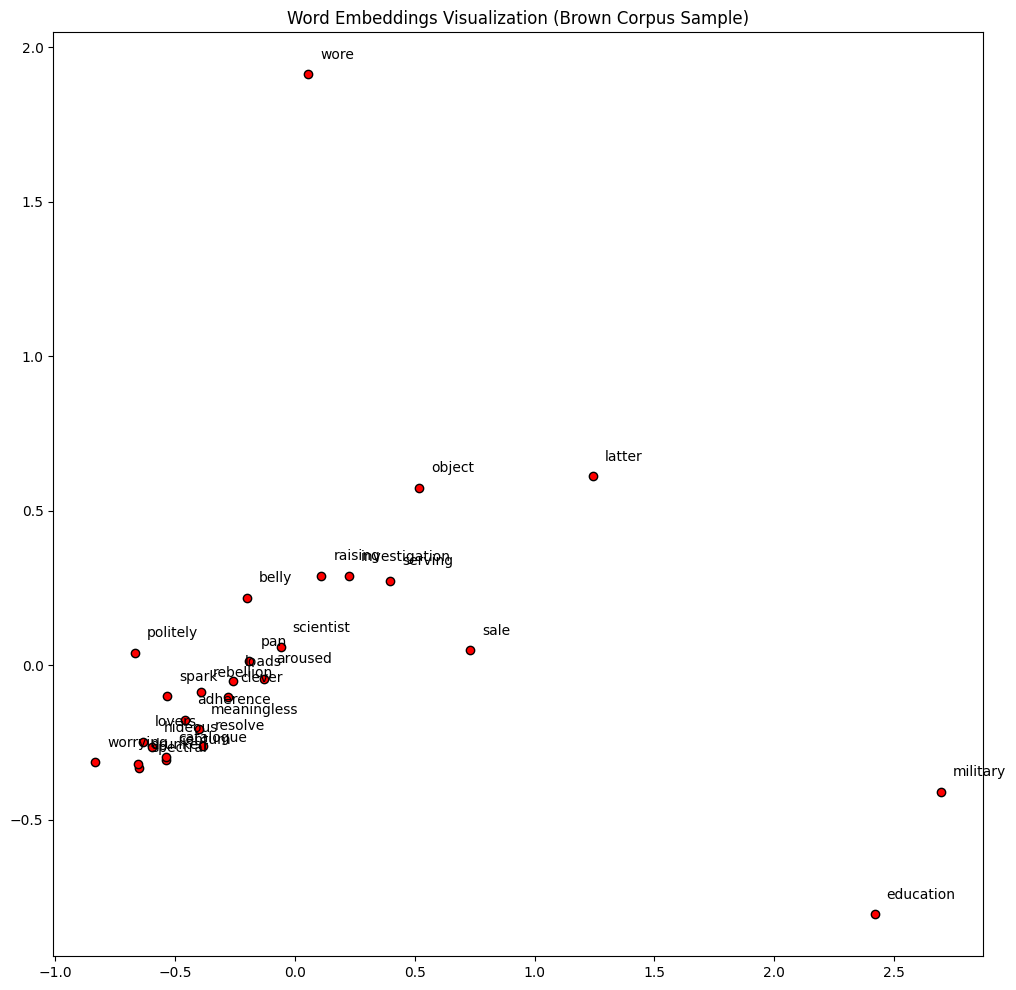

In [20]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import brown
import random

# Extract words from the Brown corpus and filter out duplicates
words_from_brown = list(set(word.lower() for sent in brown.sents() for word in sent))

# Randomly sample a subset of words for visualization (optional)
# Adjust `sample_size` to include more or fewer words
sample_size = 100
random_words = random.sample(words_from_brown, sample_size)

# Filter out words not in the Word2Vec vocabulary
valid_words = [word for word in random_words if word in new_model.wv.key_to_index]

# Get the word vectors for the valid words
word_vectors = np.array([new_model.wv[word] for word in valid_words])

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
twodim = pca.fit_transform(word_vectors)

# Plot the results
plt.figure(figsize=(12, 12))
plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
for word, (x, y) in zip(valid_words, twodim):
    plt.text(x + 0.05, y + 0.05, word, fontsize=10)

plt.title("Word Embeddings Visualization (Brown Corpus Sample)")
plt.show()


In [27]:
# Function to load and split the dataset into semantic and syntactic questions
def load_dataset(filepath):
    """
    Load the analogy dataset and split into semantic and syntactic categories.
    Args:
        filepath (str): Path to the dataset file.
    Returns:
        tuple: Two lists containing semantic and syntactic analogy questions.
    """
    semantic_questions = []
    syntactic_questions = []
    current_section = None

    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith(":"):
                # Identify the section type
                if "capital-common-countries" in line.lower():
                    current_section = "semantic"
                elif "past-tense" in line.lower():
                    current_section = "syntactic"
                else:
                    current_section = None
            elif current_section == "semantic":
                semantic_questions.append(line.split())
            elif current_section == "syntactic":
                syntactic_questions.append(line.split())
    
    return semantic_questions, syntactic_questions

In [30]:
# Define calculate_accuracy function
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_accuracy(questions, word_vectors, word2index):
    """
    Calculate accuracy for analogy questions.
    Args:
        questions (list): List of analogy questions in format [a, b, c, d].
        word_vectors (np.array): Word embedding matrix.
        word2index (dict): Mapping of words to their indices in the embedding matrix.
    Returns:
        float: Accuracy as a percentage.
    """
    correct = 0
    total = 0

    for a, b, c, d in questions:
        try:
            # Ensure all words are in the vocabulary
            if a in word2index and b in word2index and c in word2index and d in word2index:
                vec_a = word_vectors[word2index[a]]
                vec_b = word_vectors[word2index[b]]
                vec_c = word_vectors[word2index[c]]

                # Compute vector: b - a + c
                target_vector = vec_b - vec_a + vec_c

                # Compute cosine similarities
                similarities = cosine_similarity(target_vector.reshape(1, -1), word_vectors)
                predicted_index = np.argmax(similarities)

                # Retrieve the predicted word
                predicted_word = list(word2index.keys())[predicted_index]

                if predicted_word == d:
                    correct += 1
                total += 1
        except KeyError:
            # Skip if any word is not in the vocabulary
            continue

    return (correct / total) * 100 if total > 0 else 0

In [42]:
# Load the dataset
dataset_file = "word-test.v1.txt"



# Load semantic and syntactic questions
semantic_questions, syntactic_questions = load_dataset(dataset_file)

# Prepare word vectors and word2index
word_vectors = new_model.wv.vectors  # Word embedding matrix
word2index = {word: idx for idx, word in enumerate(new_model.wv.index_to_key)}



# Calculate accuracies
semantic_accuracy = calculate_accuracy(semantic_questions, word_vectors, word2index)
syntactic_accuracy = calculate_accuracy(syntactic_questions, word_vectors, word2index)

# Print results
print(f"Semantic Accuracy: {semantic_accuracy:.2f}%")
print(f"Syntactic Accuracy: {syntactic_accuracy:.2f}%")


Semantic Accuracy: 0.00%
Syntactic Accuracy: 0.08%


In [39]:
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [40]:
print(new_model.wv['the'])

[ 0.24293298  1.5617957   0.5121485   0.52857745 -0.6878522  -0.9278225
  1.5899794  -0.10833415 -0.5321149  -0.48679182  0.63970643  0.2374652
  0.9493387  -0.41469616 -0.45870706  1.0161306  -1.3428508  -0.868837
 -0.4796059  -1.311169    0.7913593   0.9862174   0.36956704 -0.5558142
 -0.726037    0.32404464  0.54611385 -1.1215762  -1.141693    0.8444152
 -0.59419286 -0.04327312  0.04307627  0.8041814   0.27291322 -0.9345959
  0.19817194 -0.4103749  -1.2073148  -0.1963934  -1.1235744   0.36000973
 -0.06948667 -0.4403129   1.0132779   0.5542793   0.39819375  0.9400895
  0.2582892  -0.06010263 -0.10383717  0.5144473   0.46930748 -0.6184748
  0.71805584 -0.66957307  0.49415126 -0.7171561  -1.4998271   0.04714202
  1.2313678   0.76767147 -0.74596274 -1.0724891  -0.7305984   0.45220396
 -1.2393025   0.8642767  -0.7585473   0.6133182   0.07486981 -0.11232229
 -0.5617895  -0.81546354  0.22068542  1.2461424   0.8397422  -0.4387315
  0.06597789 -0.43028614 -0.03245175  0.8370363   0.54896975 